<h1> Quantum measurements, Heisenberg's uncertainty principle and Bell inequalities </h1>

<h2>Simulating a measurement on a qubit</h2>

<h3>We import all the required libraries</h3>

We also import some extra ones just in case

In [66]:
%matplotlib inline
#from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import eig
from qutip import *
plt.rcParams["figure.figsize"] = (12,9)

In [67]:
# Define the Phv measurement operator:
MOpz= sigmaz()
MOpx= sigmax()
MOpy= sigmay()

In [68]:
ψ = ((2-1j)*basis(2,0)+(1-3j)*basis(2,1)).unit()
ψ2=(basis(2,0)+basis(2,1)).unit()
ψ3=basis(2,0)

<h3> Function to generate the lab results </h3>

The function to generate a data set of $N$ possible results for the measure of the 3 values of the spin operators on a randomly generated state.

The function uses the numpy function 

random.choice(set_of_allowed_results, number_of_results_to_generate, probabilities_of_the_allowed_results)


In [69]:
def GenerateLabResults(N):
    state=((np.random.random()+1j*np.random.random())*basis(2,0)+(np.random.random())*basis(2,1)).unit()
    print(state)
    oper=[0.5*sigmax(), 0.5*sigmay(), 0.5*sigmaz()]
    data=[]
    for k in oper:
        eigenv1 = k.eigenstates()[1][0]
        eigenv2 = k.eigenstates()[1][1]
        allowed_results = k.eigenstates()[0]
        probability_amps = [qo.full()[0][0] for qo in [eigenv1.dag()*state, eigenv2.dag()*state]]
        pvals = [abs(pa.conjugate()*pa) for pa in probability_amps]
        dataK=np.random.choice(allowed_results,size=N, p=pvals)
        data.append(dataK)
        print(state)
    return data


<h3> Statistical tools of the set of measurements </h3>

We have created a set of possible lab results for the three operators. From these "experimental" results we can try to identify their properties:

* data.var(): variance of the set "data"

* data.mean(): mean of the set "data"

* plt.hist(real(data)): represent a histogram from the results in the set "data"

In [70]:
datax,datay,dataz=GenerateLabResults(1000000)
sx=datax.mean()
sy=datay.mean()
sz=dataz.mean()

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.54903935+0.81138343j]
 [0.20053108+0.j        ]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.54903935+0.81138343j]
 [0.20053108+0.j        ]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.54903935+0.81138343j]
 [0.20053108+0.j        ]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.54903935+0.81138343j]
 [0.20053108+0.j        ]]


In [71]:
print("Variance: ",datax.var())
print("Mean: ",datax.mean())

Variance:  0.2375365103999999
Mean:  0.11164


In [72]:
print("Variance: ",datay.var())
print("Mean: ",datay.mean())

Variance:  0.22374303839999998
Mean:  -0.16204


In [73]:
print("Variance: ",dataz.var())
print("Mean: ",dataz.mean())

Variance:  0.038429438975999985
Mean:  0.459968


(array([388360.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 611640.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

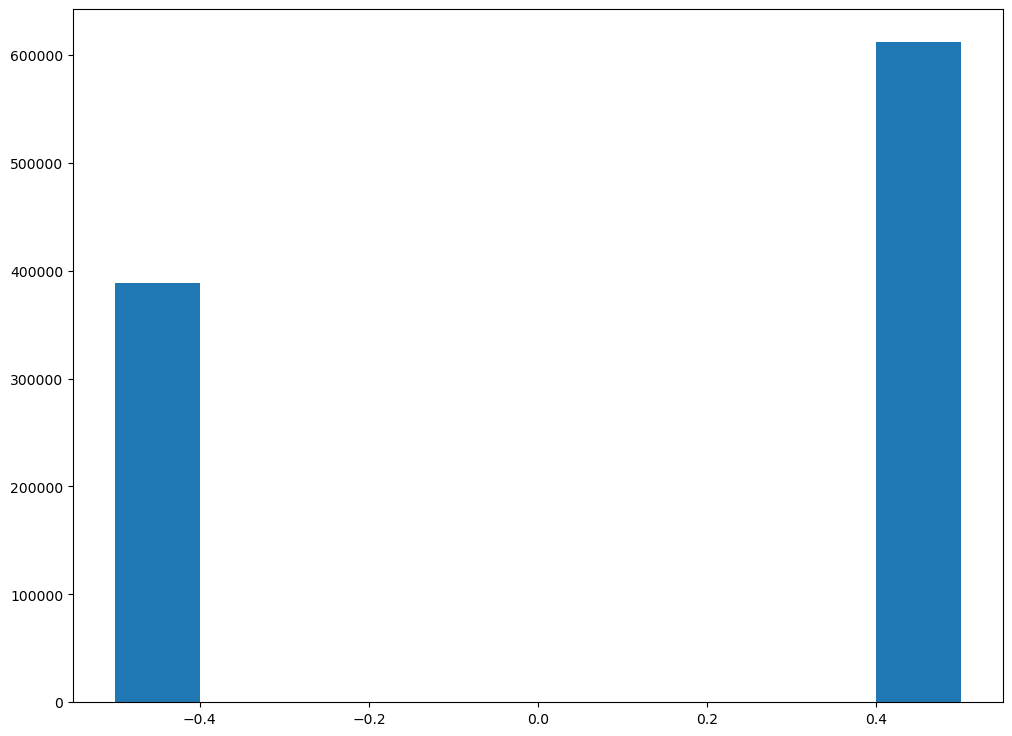

In [74]:
plt.hist(np.real(datax))

(array([662040.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 337960.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

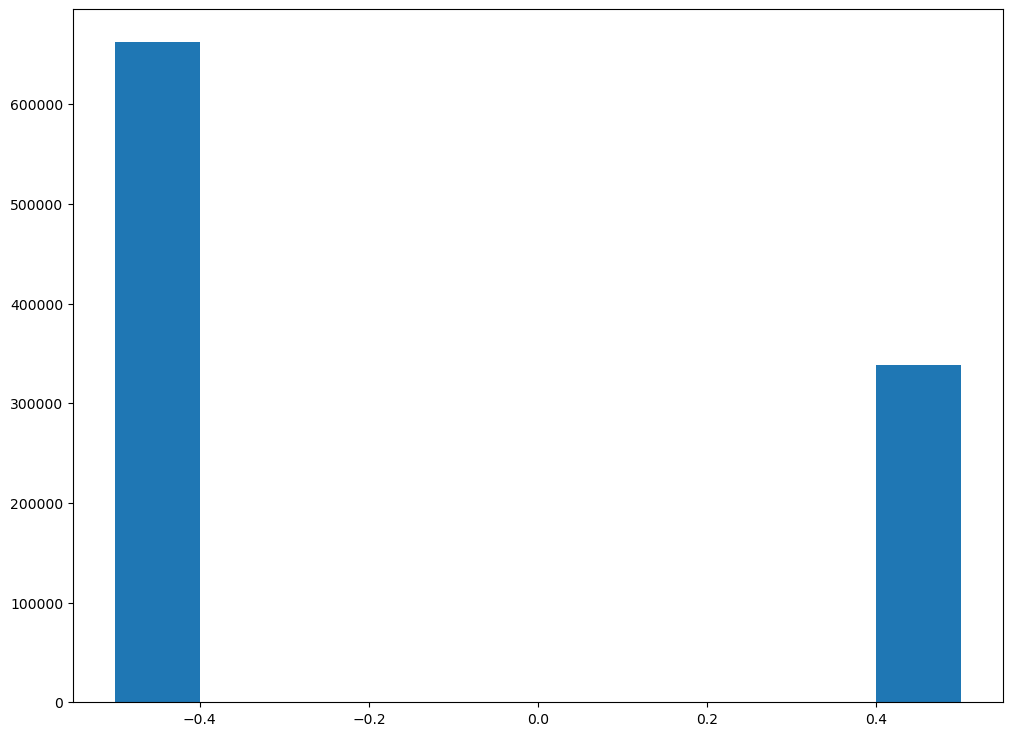

In [75]:
plt.hist(np.real(datay))

(array([ 40032.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 959968.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

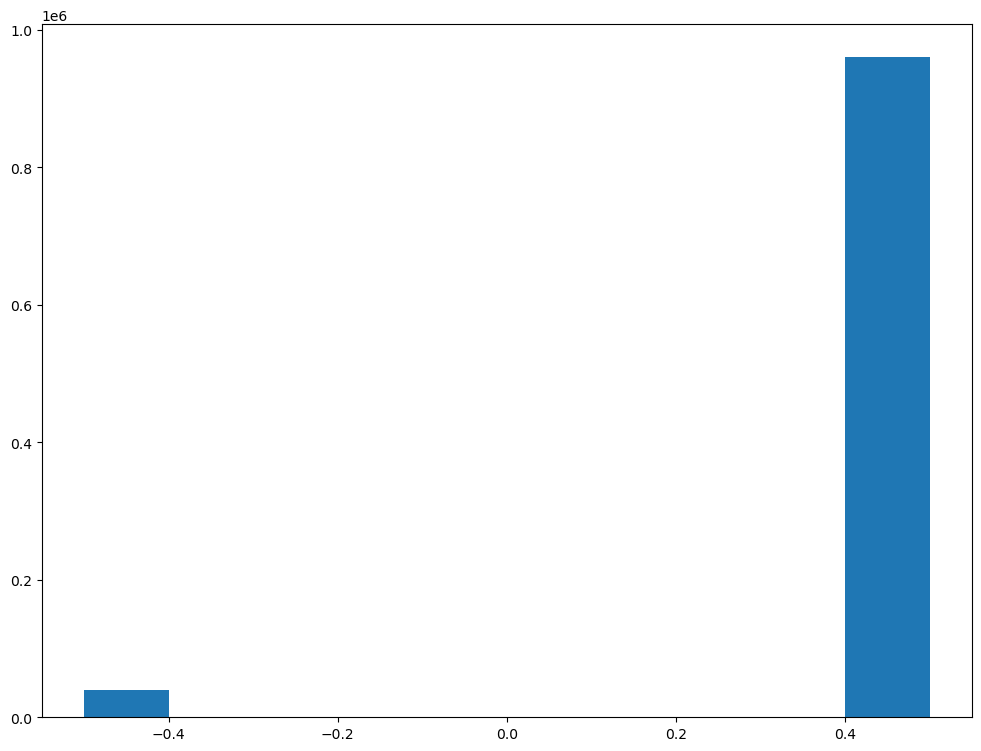

In [76]:
plt.hist(np.real(dataz))

In [77]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.7.5
Numpy,1.24.3
SciPy,1.11.1
matplotlib,3.7.2
Cython,3.0.9
Number of CPUs,6
BLAS Info,INTEL MKL
IPython,8.15.0
Python,"3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]"
OS,nt [win32]


## Ejercicio 4.1. La medida cuántica.

## M1. Se identifique el estado con el que se han generado las medidas. ¿Es posible determinar completamente el vector de $\mathbb{C}^2$ que determina el estado, según el postulado I? ¿Por qué?

La forma general de un estado en forma polar biene dada por:

$$
    |\psi\rangle = \begin{pmatrix} a e^{i\alpha} \\ b e^{i\beta} \end{pmatrix} \qquad a,b,\alpha,\beta \in \mathbb{C}
$$

A partir de las medidas de los observables $\hat\sigma_x,\hat\sigma_y,\hat\sigma_z$ podemos obtener información del estado utilizdo. Debido al primer postulado no podemos conocer el estado en su totalidad, la excepción es una constante compleja $\lambda$ que lo multiplica. Por lo tanto, podremos conocer el estado en la forma:

$$
    |\psi\rangle = \lambda \begin{pmatrix} a e^{i\varphi} \\ b  \end{pmatrix} \qquad \varphi=\alpha-\beta \qquad \lambda \in \mathbb{C}
$$

Para conocer las componentes del estado calculamos el valor esperado de los observables, $\langle\hat\sigma_x\rangle$, $\langle\hat\sigma_y\rangle$, $\langle\hat\sigma_z\rangle$.

$$
    \langle\hat\sigma_x\rangle = \langle\psi | \hat\sigma_x | \psi\rangle = 2r_1r_2cos\varphi
    \\ \langle\hat\sigma_y\rangle = \langle\psi | \hat\sigma_y | \psi\rangle = 2r_1r_2sin\varphi
    \\ \langle\hat\sigma_z\rangle = \langle\psi | \hat\sigma_z | \psi\rangle = a^2-b^2
$$

Resolviendo el sistema de ecuaciones llegamos a la expresión para cada componente:

$$
    a = \sqrt{\frac{1}{2}(1+\langle\hat\sigma_z\rangle)}
    \\ b = \sqrt{\frac{1}{2}(1-\langle\hat\sigma_z\rangle)}
    \\ \varphi = arctan(\frac{\langle\hat\sigma_y\rangle}{\langle\hat\sigma_x\rangle})
$$

In [78]:
a = np.sqrt((1+dataz.mean()*2)*0.5) # El factor 2 multiplicando viene de que nosotros conocemos el valor esperado del espín
b = np.sqrt((1-dataz.mean()*2)*0.5) 
ϕ = np.arctan(datay.mean()/datax.mean())

ψ = (basis(2,0)*(np.cos(ϕ)+1j*np.sin(ϕ))*a + basis(2,1)*b).unit()

ψ

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.5558761 -0.80682697j]
 [0.20007998+0.j        ]]

El motivo por el que no podemos determinar completamente un estado es debido a que un mismo rayo cuántico está descrito igualmente por un estado $|\psi\rangle$ que por un estado $\lambda|\psi\rangle$, por lo tanto no podemos saber cual le corresponde exactamente.

## M2. Estudiar cómo depende del tamaño de la muestra de puntos el error cometido al estimar los valores medios de las tres componentes del espín con la funciónanterior, que emplea una muestra finita.

Disponemos de $N$ medidas de un observable utilizando un estado $|\psi\rangle$. Estas medidas siguen una distribución de probabilidad desconocida, pero podemos conocer el valor esperado $\mu$ y su error $\sigma$ mediante el cálculo del primer y segundo momento de la distribución. Pretendemos encontrar un método para, a partir de medidas del observable, obtener un resultado promedio lo más cercano posible al valor esperado. Esto es encontrar una forma de minimizar el error cometido al calcular la media de nuestros $N$ datos. 

Para un conjunto de datos $N$ podemos calcular su media muestral $\bar x= \dfrac{1}{N}\sum_i^N x_i$ y el error absoluto $\vert\bar x-\mu\vert$ obteniendo así una primera aproximación al error cometido en la determinación de un valor cercano al valor teórico. 

In [14]:
#Generamos los resultados del experimento
Npoints=500000 # Número de datos que se van a generar
datax,datay,dataz = GenerateLabResults(Npoints) # Se generan los datos
 
Nmedias=5000 # Numero de medias que se van a realizar, variando el tamaño de la muestra

#Se generan los arrays necesarios en los que se van a almacenar los resultados
dispmeanx=np.zeros(Nmedias)
dispmeany=np.zeros(Nmedias)
dispmeanz=np.zeros(Nmedias)

errormean2x=np.zeros(Nmedias)
errormean2y=np.zeros(Nmedias)
errormean2z=np.zeros(Nmedias)

divisionsize=int(Npoints/Nmedias)

nresults=np.linspace(divisionsize,Npoints,Nmedias) # Array que nos va a indicar el tamaño de la muestra en cada paso
# El array empieza en divisionsize y termina en Npoints y genera un total de Nmedias puntos entre ellos. Por lo tanto el tamaño de la muestra aumenta de 100 en 100.
# nresults[:100]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.56323484+0.79101604j]
 [0.23887265+0.j        ]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.56323484+0.79101604j]
 [0.23887265+0.j        ]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.56323484+0.79101604j]
 [0.23887265+0.j        ]]


Text(0, 0.5, 'Error expected value')

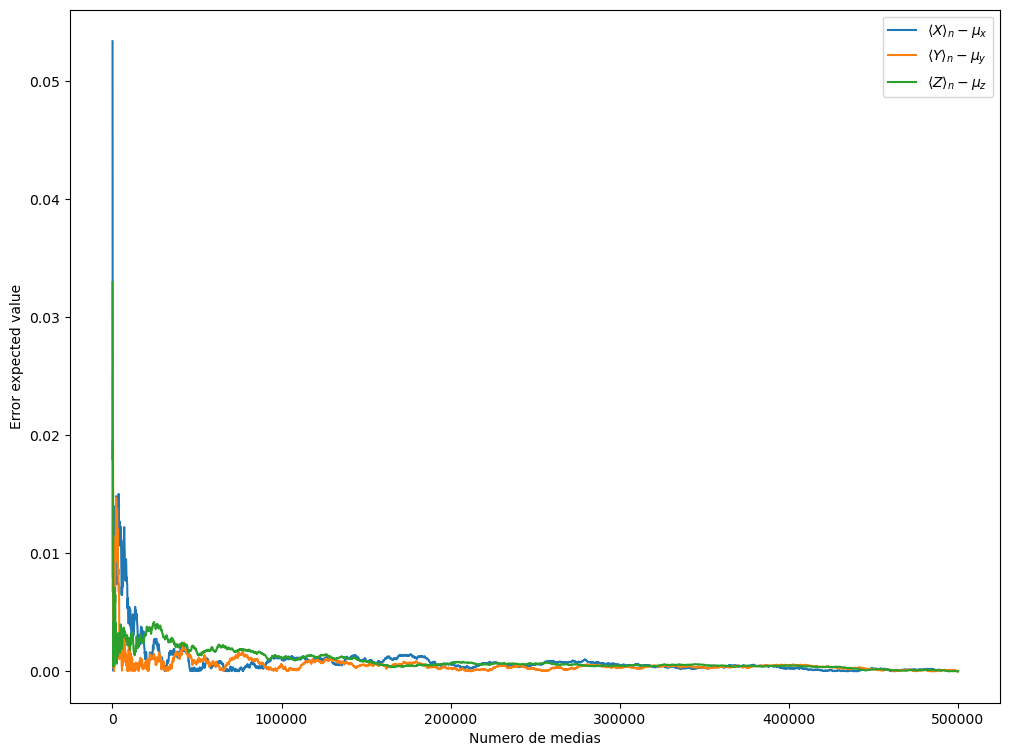

In [15]:
#Calculamos el error como la diferencia con el valor teórico conocido para la media.
Meanx=datax.mean()
Meany=datay.mean()
Meanz=dataz.mean()
for i in range(Nmedias):
    Nmean=int(nresults[i])
 
    dispmeanx[i]=np.abs(datax[:Nmean].mean()-Meanx)
    dispmeany[i]=np.abs(datay[:Nmean].mean()-Meany)
    dispmeanz[i]=np.abs(dataz[:Nmean].mean()-Meanz)

 
plt.plot(nresults,dispmeanx,label="$\\langle X\\rangle_n-\\mu_x$")
plt.plot(nresults,dispmeany,label="$\\langle Y\\rangle_n-\\mu_y$")
plt.plot(nresults,dispmeanz,label="$\\langle Z\\rangle_n-\\mu_z$")

#plt.plot(nresults,np.sqrt(varx/nresults),label="theory")
#plt.xlim([0, 50000])
#plt.ylim([0, 0.10])
plt.legend(loc="upper right")

plt.xlabel('Numero de medias')
plt.ylabel('Error expected value')

En la gráfica se pueden observar muchas perturbaciones, es decir, el error absoluto no disminuye de manera suave al aumentar el tamaño de la muestra. 
Esto es debido a que la media es una suma de variables aleatorias, por lo tanto, esta también es una variable aleatoria. Asi que es posible que el error pueda disminuir tanto para valores pequeños de $N$ como para grandes.

Debido a que conocemos el valor teórico $\mu$ podemos realizar el siguiente proceso para calcular el error del estimador de la media:

- Dividimos los datos en $N_e$ cajas del mismo tamaño N.
- De esas cajas calculamos la media mediante el estimador. 
- Con este nuevo conjunto de datos calculamos su dispersión mediante:
\begin{equation}
\sigma_{\bar x}(N)=\sqrt{\dfrac{1}{N_e}\sum_e^{N_e} (\bar x_e(N)-\mu)^2}
\end{equation}



Si no conocemos el valor de $\mu$ podemos obtenerlo como una funcion de variables aleatorias.
$\bar x$ es un buen estimador de $\mu$ debido a que es no sesgado, es decir, su valor esperado corresponde con $\mu$, y además es consistente. Esta última propiedad se comprueba calculando su desviación estándar. Podemos hallarla haciendo la raiz de la varianza del estimador: $\sigma_{\bar x}=\dfrac{\sigma}{\sqrt{N}}$. Comprobamos que es consistente haciendo tender a infinito el tamaño de la muestra ya que en ese caso la desviación tiende a cero. Por lo tanto, esperamos justo obetener esa relación, la disminución del error cometido al estimar el valor real al aumentar el número de medidas.  

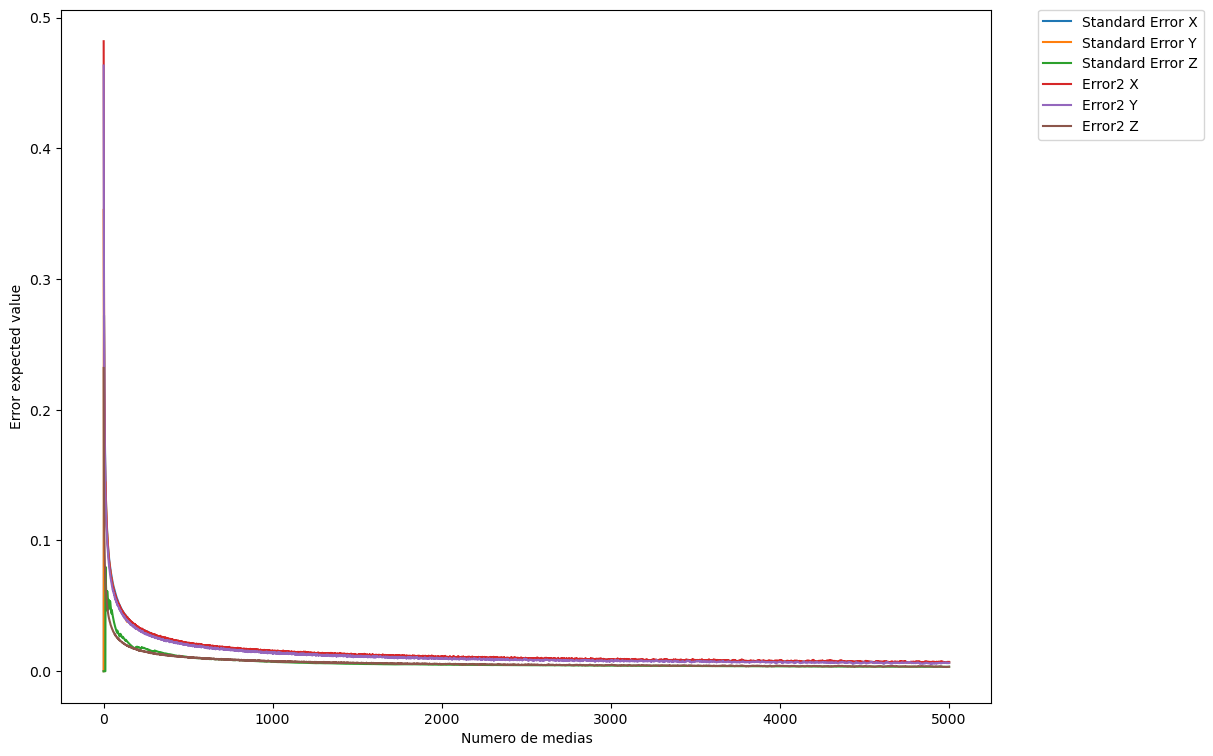

In [16]:
Npoints=500000
Nmedias=5000
avmeanx=np.zeros(Nmedias) # Define los arrays necesarios
avmeany=np.zeros(Nmedias)
avmeanz=np.zeros(Nmedias)
avmeanx2=np.zeros(Nmedias)
avmeany2=np.zeros(Nmedias)
avmeanz2=np.zeros(Nmedias)
dispmeanx=np.zeros(Nmedias)
dispmeany=np.zeros(Nmedias)
dispmeanz=np.zeros(Nmedias)

divisionsize=int(Npoints/100/Nmedias)
nresults=np.linspace(divisionsize,Npoints/100,Nmedias)


for i in range(Nmedias):
    Nmean=int(nresults[i])
    Numeropaquetes=int(Npoints/Nmean)
    for j in range(Numeropaquetes):
        #We consider an average of the measures to represent one point of the distribution. This smoothes the 
        #system
        avmeanx2[i]+=(datax[j*Nmean:(j+1)*Nmean].mean())**2/Numeropaquetes
        avmeany2[i]+=(datay[j*Nmean:(j+1)*Nmean].mean())**2/Numeropaquetes
        avmeanz2[i]+=(dataz[j*Nmean:(j+1)*Nmean].mean())**2/Numeropaquetes
        avmeanx[i]+=(datax[j*Nmean:(j+1)*Nmean].mean())/Numeropaquetes
        avmeany[i]+=(datay[j*Nmean:(j+1)*Nmean].mean())/Numeropaquetes
        avmeanz[i]+=(dataz[j*Nmean:(j+1)*Nmean].mean())/Numeropaquetes
    #Se hacen las raices cuadradas. ¿Quizás esto sea un problema? ¿Es el estimador de la raíz  de una magnitud la raíz del estimador de la misma?
    dispmeanx[i]=np.sqrt(avmeanx2[i]-avmeanx[i]**2)
    dispmeany[i]=np.sqrt(avmeany2[i]-avmeany[i]**2)
    dispmeanz[i]=np.sqrt(avmeanz2[i]-avmeanz[i]**2)
    
    errormean2x[i]=np.sqrt((0.25-(datax[:Nmean].mean())**2)/(Nmean))
    errormean2y[i]=np.sqrt((0.25-(datay[:Nmean].mean())**2)/(Nmean))
    errormean2z[i]=np.sqrt((0.25-(dataz[:Nmean].mean())**2)/(Nmean))
    
plt.plot(nresults,errormean2x,label="Standard Error X")
plt.plot(nresults,errormean2y,label="Standard Error Y")
plt.plot(nresults,errormean2z,label="Standard Error Z")

    
    
#Ploteo de resultados
plt.plot(nresults,dispmeanx,label="Error2 X")
plt.plot(nresults,dispmeany,label="Error2 Y")
plt.plot(nresults,dispmeanz,label="Error2 Z")

plt.xlabel('Numero de medias')
plt.ylabel('Error expected value')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left', borderaxespad=0.)

Vemos como esto efectivamente se cumple, conseguimos evitar la componente estocástica, dando lugar a una tendencia del error de disminuir al aumentar el tamaño de la muestra.

## Ejercicio 4.2. El principio de incertidumbre.

## I1. Resolver el ejercicio 2.1

$$
\hat A \hat B=\frac 12(\hat A \hat B+\hat B \hat A)+\frac 12(\hat A \hat B- \hat B \hat A)=\frac 12[\hat A\hat B]_+ +\frac i2[\hat A\hat B]
$$

Donde:
$$
    [\hat A,\hat B]_+=\hat A\hat B+\hat A\hat B \qquad y  \qquad [\hat A,\hat B]=-i(\hat A\hat B-\hat A\hat B)
$$

En general se deben cumlpir las siguientes propiedades:
- El producto de los operadores autoadjuntos $\hat A\hat B$ no tiene por qué ser autoadjunto a su vez, sólo lo será en el caso de que ambos operadores conmuten.
- El anticonmutador $[\hat A,\hat B]_+$ de dos operadores autoadjuntos siempre es autoadjunto.
- El conmutador de dos operadores autoadjuntos $[\hat A,\hat B]$ , tal como se ha definido (con la unidad imaginaria), es siempre autoadjunto.

Demostración:

- El producto de los operadores autoadjuntos $\hat A\hat B$ no tiene por qué ser autoadjunto a su vez,  sólo lo será en el caso de que ambos operadores conmuten:

$$
(\hat A\hat B)^\dagger=\hat B^\dagger \hat A^\dagger=\hat B\hat A=\hat A\hat B
$$

La última igualdad sólo ocurre en el caso de que $\hat A$ y $\hat B$ conmuten.

- El anticonmutador $[\hat A,\hat B]_+$ de dos operadores autoadjuntos siempre es autoadjunto: 

Es autoadjunto si $ [\hat A,\hat B]_+ ^ \dagger = [\hat A,\hat B]_+ $

$$
[\hat A,\hat B]_+ ^ {\dagger} = (\hat A\hat B+\hat B\hat A) ^ \dagger = (\hat A\hat B)^\dagger+(\hat B\hat A)^\dagger=\hat B^\dagger\hat A^\dagger+\hat A^\dagger\hat B^\dagger=\hat B\hat A+\hat A\hat B=[\hat A,\hat B]_+  
$$  


- El conmutador de dos operadores autoadjuntos $[\hat A,\hat B]$ , tal como se ha definido (con la unidad imaginaria), es siempre autoadjunto.

Es autoadjunto si $ [\hat A,\hat B] ^ \dagger = [\hat A,\hat B] $

$$
[\hat A,\hat B]^\dagger=[-i(\hat A\hat B-\hat B\hat A)]^\dagger=i(\hat A\hat B,\hat B\hat A)^\dagger=i[(\hat A\hat B)^\dagger-(\hat B\hat A)^\dagger]=i(\hat B\hat A-\hat A\hat B)=-i(\hat A\hat B-\hat B\hat A)=[\hat A,\hat B]
$$


## I2. Empleando las funciones de qutip (expect(operator, state) y variance(operator, state)) Construir un pequeño programa para verificar la fórmula (26) para el caso:

$$
\hat A = \hat\sigma_{x} \qquad \hat B = \hat\sigma_z
$$

Y evaluarlo en los estados:
$$
|\psi_1\rangle = |+\rangle
\\ |\psi_2\rangle = (0,160+0,801i)|+\rangle-(0,320+0,480i)|-\rangle
\\ |\psi_3\rangle = \frac{1}{\sqrt2}(|+\rangle+|-\rangle)
$$

La fórmula (26) es:

$$
    \Delta\hat A_{\psi}\Delta\hat B_{\psi}\geq\frac{1}{2}|\langle\psi|[\hat A,\hat B]|\psi\rangle|
$$

In [42]:
A = sigmax()
B = sigmaz()
C = sigmay()

a = 0.160 + 0.801j
b = -0.320 - 0.480j

ψ1 = basis(2,0)
ψ2 = a*basis(2,0)+b*basis(2,1)
ψ3 = (basis(2,0)+basis(2,1)).unit()

def conmutador(A,B):
    return -1j*(A*B-B*A)

def incertidumbre(A,ψ):
    return np.sqrt(variance(A, ψ))

def Heisenberg(A,B,ψ):
    I = incertidumbre(A,ψ)*incertidumbre(B,ψ)
    E = expect(conmutador(A,B),ψ)
    if (I >= 0.5*E):
        print("SE CUMPLE")
        
    else:
        print("NO SE CUMPLE")
        
    print("ΔAΔB , 0.5*<[A,B]>")
    print(I,0.5*E)
    print('<A> , <B>')
    print(expect(A,ψ),expect(B,ψ))
    print('<A^2> , <B^2>')
    print(expect(A*A,ψ),expect(B*B,ψ))
    print("ΔA , ΔB")
    print(incertidumbre(A,ψ),incertidumbre(B,ψ))
    print("\n")
    print("----------------------------\n")   
               
Heisenberg(A,B,ψ1)
Heisenberg(A,B,ψ2)
Heisenberg(A,B,ψ3)


SE CUMPLE
ΔAΔB , 0.5*<[A,B]>
0.0 0.0
<A> , <B>
0.0 1.0
<A^2> , <B^2>
1.0 1.0
ΔA , ΔB
1.0 0.0


----------------------------

SE CUMPLE
ΔAΔB , 0.5*<[A,B]>
0.4623994865034745 -0.35904
<A> , <B>
-0.87136 0.33440100000000006
<A^2> , <B^2>
1.0000010000000001 1.0000010000000001
ΔA , ΔB
0.4906452388437088 0.9424314145862287


----------------------------

SE CUMPLE
ΔAΔB , 0.5*<[A,B]>
1.4901161193847655e-08 0.0
<A> , <B>
0.9999999999999998 0.0
<A^2> , <B^2>
0.9999999999999998 0.9999999999999998
ΔA , ΔB
1.4901161193847656e-08 0.9999999999999999


----------------------------



- ¿En qué ocasiones existirá la posibilidad de medir experimentalmente componentes del espín de una partícula de forma absolutamente precisa?

Únicamente es posible en el caso que el valor esperado del conmutador sea nulo, y por lo tanto el valor esperado del operador de la tecera componente no involucrada (debido a la relación de conmitación entre los operadores de espín). Además, se debe cumplir que el valor esperado de los observables al cuadrado sea cero para que así la incertidumbre del operador aplicado al estado $|\psi\rangle$ sea cero. 

- ¿Es posible medir simultaneamente dos componentes cualesquiera en algún estado? ¿Y las tres?

Debido a que los operadores de espín no conmutan no se puede obtener una medida con presisión infinita de dos componentes del espín. Si se mide una de las dos con una precisión baja se sacrifica precisión en la medida de otro de los componentes, cumpliendose siempre la relación de incertidumbre.  Esto ocurre para cualquier combinación poisble entre los operadores de espín, por lo tanto no podemos determinar con precisión infinita las tres componentes del espín simultaneamente.

- ¿Existe esa posibilidad para los operadores posición y momento actuando en un espacio de Hilbert funcional $\mathcal{L}^2 (D),d\mu$? ¿Por qué?

Si sustituimos en la ecuación (26) $\hat A$ y $\hat B$ por el operador posición $\hat X$ y por el operador momento $\hat P$  obtenemos la siguiente relación de incertidumbre:

$$
    \Delta\hat X\Delta\hat P \geq \frac{\hbar}{2}
$$

El significado de esta expresión es que debido a que el propio proceso de medida altera los resultados, es imposible la determinación exacta del momento y la posición al mismo tiempo.

## Ejercicio 4.3. El teorema de Bell.

## B1. Ejercicio 2.2

## B2. Estudiar el Teorema 2.1

In [26]:
Q = tensor(sigmaz(),qeye(2))
R = tensor(sigmax(),qeye(2))
S = -tensor(qeye(2),sigmaz()+sigmax())/np.sqrt(2)
T = tensor(qeye(2),sigmaz()-sigmax())/np.sqrt(2)

def bell(ψ):
    C=Q*S+R*S+R*T-Q*T
    if (expect(C,ψ)<=2):
        print("Se cumple")
        print(expect(C,ψ))
    else:
        print("No se cumple")
 

## Estados. ψ1 y ψ3 con Clebsh-Gordan 1/2 x 1/2 

ψ1 = (tensor(basis(2,0),basis(2,1))-tensor(basis(2,1),basis(2,0)))/np.sqrt(2)
ψ2 = (tensor(basis(2,0),basis(2,0))-tensor(basis(2,1),basis(2,1)))/np.sqrt(2)
ψ3 = tensor(basis(2,0),basis(2,0))
ψ4 = (tensor(basis(2,0),basis(2,1))+tensor(basis(2,0),basis(2,0)))/np.sqrt(2)

bell(ψ1)
bell(ψ2)
bell(ψ3)
bell(ψ4)

No se cumple
Se cumple
0.0
Se cumple
-1.414213562373095
Se cumple
0.0


## B3. ¿Cualquier sistema cuántico va a violar la desigualdad de Bell para cualquier conjunto de operadores? ¿Siempre lo hará si se encuentra en un estado entrelazado? ¿Existe un conjunto de operadores adaptados al estado $|\psi_2\rangle$?